In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=np.load('./data/pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [3]:
x=data['arr_0']
y=data['arr_1']
mean=data['arr_2']

In [4]:
#splitting training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4374, 50), (4374,), (1094, 50), (1094,))

# Training ML  Model

In [6]:
from sklearn.svm import SVC

In [12]:
model=SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True)

In [13]:
model.fit(x_train,y_train)
print("Success")

Success


In [14]:
#performance
model.score(x_train,y_train)

0.8593964334705075

In [15]:
model.score(x_test,y_test)

0.7970749542961609

## Model Performance

In [16]:
from sklearn import metrics

In [18]:
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)

In [19]:
cm=metrics.confusion_matrix(y_test,y_pred)

In [20]:
cm

array([[328, 114],
       [108, 544]], dtype=int64)

In [25]:
#classification report
c=metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(c).T


,precision,recall,f1-score,support
male,0.752294,0.742081,0.747153,442.000000
female,0.826748,0.834356,0.830534,652.000000
accuracy,0.797075,0.797075,0.797075,0.797075
macro avg,0.789521,0.788219,0.788843,1094.000000
weighted avg,0.796667,0.797075,0.796846,1094.000000


In [26]:
#kappa_score
metrics.cohen_kappa_score(y_test,y_pred)

0.5777001884863364

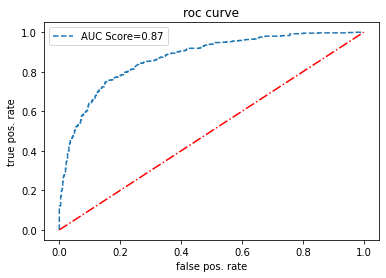

In [31]:
#ROC-female
fpr,tpr,thresh=metrics.roc_curve(y_test,y_prob[:,1])
auc_score=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,'--')
plt.plot([0,1],[0,1],'r-.')
plt.xlabel('false pos. rate')
plt.ylabel('true pos. rate')
plt.title('roc curve')
plt.legend(['AUC Score=%0.2f'%auc_score])
plt.show()

# Hyper Parameter Tuning

In [32]:
tuning=SVC()

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
para_grid={'C':[1,10,20,30,40,50,100],
          'kernel':['rbf','poly'],
          'gamma':[0.005,0.002,0.001,0.01,0.05,0.1],
          'coef0':[0,1],
          }

In [35]:
model_grid=GridSearchCV(tuning,param_grid=para_grid,scoring='accuracy',cv=5,verbose=1)

In [36]:
model_grid.fit(x,y)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 40, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.005, 0.002, 0.001, 0.01, 0.05, 0.1],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [39]:
model_grid.best_params_

{'C': 10, 'coef0': 0, 'gamma': 0.005, 'kernel': 'rbf'}

In [41]:
model_grid.best_score_

0.7849295249309634

In [45]:
#with the best parameters we will build our model
best_model=SVC(C=10,kernel='rbf',gamma=0.005,coef0=0,probability=True)

In [46]:
best_model.fit(x_train,y_train)
best_model.score(x_test,y_test)

0.7989031078610603

In [47]:
#Best Model  Performance
y_pred=best_model.predict(x_test)
y_prob=best_model.predict_proba(x_test)

In [48]:
cm=metrics.confusion_matrix(y_test,y_pred)

In [49]:
cm

array([[337, 105],
       [115, 537]], dtype=int64)

In [52]:
#classification report
c=metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(c).T

,precision,recall,f1-score,support
male,0.745575,0.762443,0.753915,442.000000
female,0.836449,0.823620,0.829985,652.000000
accuracy,0.798903,0.798903,0.798903,0.798903
macro avg,0.791012,0.793032,0.791950,1094.000000
weighted avg,0.799734,0.798903,0.799251,1094.000000


In [53]:
#kappa_score
metrics.cohen_kappa_score(y_test,y_pred)

0.5839354985928349

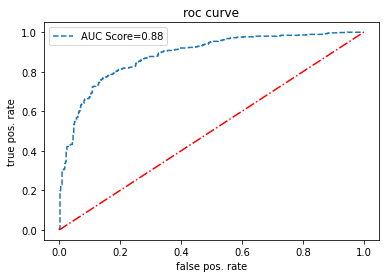

In [54]:
#ROC-female
fpr,tpr,thresh=metrics.roc_curve(y_test,y_prob[:,1])
auc_score=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,'--')
plt.plot([0,1],[0,1],'r-.')
plt.xlabel('false pos. rate')
plt.ylabel('true pos. rate')
plt.title('roc curve')
plt.legend(['AUC Score=%0.2f'%auc_score])
plt.show()

In [55]:
#Saving our model
pickle.dump(best_model,open('svm_best_model.pickle','wb'))

In [56]:
pickle.dump(mean,open('./model/preprocessing_mean.pickle','wb'))